

# Project: The Movie Database (TMDb) Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset is from The Movie database, it contains over 10,000 movies with their various titles, ratings, budgets, revenue and so on.
> The aim of this analysis is to answer the following question:
> 1. Which genres are most popular from all time?
>* Finding the answer to this question will also help to determine the amount of revenue they generate
> 2. Which movies are the most popular of all time?
>* Answering this question will help us to know the characteristics of what makes a movie popular, whether it's influenced by high budget or not.
> 3. Which movie title has the highest budget?
>* The answer to this question can help us find out if high budget movies are equivalent to high revenue movies.
> 4. Which movie title has the highest revenue?
> * Finding the answer to this question can help us check the budget associated with it, and the properties they have.
> 5. What is the association of runtime over the period of time?
> * We can find out if movie runtime increases or decreases over the years by answering this question
> 6. What is the relationship of revenue over the period of time?
> * This will help us know if movie industries are earning more revenue from movie production over the years.


In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling




In [2]:
# loading the dataset into pandas dataframe
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

### The dataset contains the following columns: 
* **id** - The index number of the various rows
* **imdb_id** - The index number of the movie in the IMDb database
* **popularity** - The popularity rating of the movie
* **budget** - The initial budget of the movie
* **revenue** - The initial revenue of the movie
* **original_title** - The original movie title 
* **cast** - The various casts of the movie
* **homepage** - The website of the movie
* **director** - The movie director
* **tagline** - The taglines associated with a movie
* **keywords** - The keywords associated with a movie
* **overview** - A brief overview of a particular movie
* **runtime** - The time total run time of a movie in minutes
* **genres** - The different genres associated with a movie
* **production_companies** - The companies involved with the production of a movie
* **release_date** - The date the movie was released
* **vote_count** - The total vote count of a movie
* **vote_average** - The average vote count of a movie
* **release_year** - The year a movie was released
* **budget_adj** - The final or adjusted budget of a movie accounting for inflation over time.
* **revenue_adj** - The final or adjusted revenue of a movie accounting for inflation over time.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Running ```df.info()``` shows us that the dataset contains 10866 entries(rows) and 21 columns.

In [5]:
# counting the number of missing rows
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The following columns have missing values :
1. imdb_id
2. cast
3. homepage
4. director
5. tagline
6. keywords
7. overview
8. genres
9. production_companies

In [6]:
# checking for duplicate rows
df.duplicated().sum()

1

 There is only one duplicated row in the dataframe

>* After some observations I discovered there are 9 columns with missing values but will be deleting the more irrelevant ones to 
> our questions like the imdb_id, homepage, tagline, keywords, casts, overview and production_companies columns
>* I will also be dropping the rows with missing values on columns like genres, directors.
>* There is one duplicate row that will also be removed
>* The data in genres column are separated with "|" character so it needs more cleaning 
# Data Cleaning 

### Dropping columns with missing values

In [7]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'cast'], axis=1, inplace=True)

In [8]:
df.head(3)

id  popularity     budget     revenue      original_title  \
0  135397   32.985763  150000000  1513528810      Jurassic World   
1   76341   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201           Insurgent   

           director  runtime                                     genres  \
0   Colin Trevorrow      124  Action|Adventure|Science Fiction|Thriller   
1     George Miller      120  Action|Adventure|Science Fiction|Thriller   
2  Robert Schwentke      119         Adventure|Science Fiction|Thriller   

  release_date  vote_count  vote_average  release_year    budget_adj  \
0       6/9/15        5562           6.5          2015  1.379999e+08   
1      5/13/15        6185           7.1          2015  1.379999e+08   
2      3/18/15        2480           6.3          2015  1.012000e+08   

    revenue_adj  
0  1.392446e+09  
1  3.481613e+08  
2  2.716190e+08

### dropping rows with missing value

In [9]:
df.dropna(how="any",inplace=True)


### dropping duplicate row

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().any()

False

## Cleaning the genres column

In [11]:
# Let's get all the genres separated with pipe "|"
df_genre_pipe = df[df['genres'].str.contains('\|')]


I'm going to take each genres row with "|" and split them and use the pandas explode function to separate them into different rows

## Splitting the genres column and exploding into new dataframe

In [12]:
df_genre_no_pipe = df_genre_pipe.assign(genres=df_genre_pipe.genres.str.split("|"))
new_genre_rows = df_genre_no_pipe.explode('genres') 
new_genre_rows.head(3)

id  popularity     budget     revenue  original_title         director  \
0  135397   32.985763  150000000  1513528810  Jurassic World  Colin Trevorrow   
0  135397   32.985763  150000000  1513528810  Jurassic World  Colin Trevorrow   
0  135397   32.985763  150000000  1513528810  Jurassic World  Colin Trevorrow   

   runtime           genres release_date  vote_count  vote_average  \
0      124           Action       6/9/15        5562           6.5   
0      124        Adventure       6/9/15        5562           6.5   
0      124  Science Fiction       6/9/15        5562           6.5   

   release_year    budget_adj   revenue_adj  
0          2015  1.379999e+08  1.392446e+09  
0          2015  1.379999e+08  1.392446e+09  
0          2015  1.379999e+08  1.392446e+09

In [13]:
# time to drop the genres row from the original dataframe
df.drop(df_genre_pipe.index, inplace=True)


## Appending cleaned new_genre_rows to df


In [14]:
df = df.append(new_genre_rows, ignore_index=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26864 entries, 0 to 26863
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              26864 non-null  int64  
 1   popularity      26864 non-null  float64
 2   budget          26864 non-null  int64  
 3   revenue         26864 non-null  int64  
 4   original_title  26864 non-null  object 
 5   director        26864 non-null  object 
 6   runtime         26864 non-null  int64  
 7   genres          26864 non-null  object 
 8   release_date    26864 non-null  object 
 9   vote_count      26864 non-null  int64  
 10  vote_average    26864 non-null  float64
 11  release_year    26864 non-null  int64  
 12  budget_adj      26864 non-null  float64
 13  revenue_adj     26864 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 2.9+ MB


In [16]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   26864.000000  26864.000000  2.686400e+04  2.686400e+04  26864.000000   
mean    58440.024903      0.707988  1.756557e+07  4.760272e+07    102.841758   
std     86513.358901      1.116378  3.465316e+07  1.324054e+08     29.800772   
min         5.000000      0.000188  0.000000e+00  0.000000e+00      0.000000   
25%     10192.000000      0.225678  0.000000e+00  0.000000e+00     90.000000   
50%     18129.000000      0.412474  5.000000e+03  0.000000e+00    100.000000   
75%     57961.000000      0.777600  2.000000e+07  3.092569e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  26864.000000  26864.000000  26864.000000  2.686400e+04  2.686400e+04  
mean     250.782720      5.954370   2000.675886  2.110920e+07  6.109446e+07  
std      638.957858      0.911253     12.770128  3.824605e+07  1.617655e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       18.000000      5.400000   1994.000000  0.000000e+00  0.000000e+00  
50%       44.000000      6.000000   2005.000000  5.041001e+03  0.000000e+00  
75%      174.000000      6.600000   2011.000000  2.714315e+07  4.402879e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

From the above summary statistics you can see at the **min** and **25%** summary that there are places in the budget, budget_adj, revenue, revenue_adj and runtime where the values are 0. In other to handle this I will be filling those values with their respective **mean** 

### Replacing the budget rows where value is 0 with budget mean 

In [17]:
df['budget'].replace(0, df.budget.mean(), inplace=True)
df.budget.describe()

count    2.686400e+04
mean     2.624504e+07
std      3.119359e+07
min      1.000000e+00
25%      1.756557e+07
50%      1.756557e+07
75%      2.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

### Replacing the revenue rows where value is 0 with the revenue mean

In [18]:
df['revenue'].replace(0, df.revenue.mean(), inplace=True)
df.revenue.describe()

count    2.686400e+04
mean     7.277206e+07
std      1.252977e+08
min      2.000000e+00
25%      4.098266e+07
50%      4.760272e+07
75%      4.760272e+07
max      2.781506e+09
Name: revenue, dtype: float64

### Replacing the revenue_adj rows where value is 0 with the revenue_adj mean

In [19]:
df['revenue_adj'].replace(0, df.revenue_adj.mean(), inplace=True)
df.revenue_adj.describe()

count    2.686400e+04
mean     9.339738e+07
std      1.521543e+08
min      2.370705e+00
25%      5.899749e+07
50%      6.109446e+07
75%      6.109446e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

### Replacing the budget_adj rows where value is 0 with the budget_adj mean

In [20]:
df['budget_adj'].replace(0, df.budget_adj.mean(), inplace=True)
df.budget_adj.describe() 

count    2.686400e+04
mean     3.153964e+07
std      3.367159e+07
min      9.210911e-01
25%      2.110920e+07
50%      2.110920e+07
75%      2.714315e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

### Replacing the runtime rows where value is 0 with the runtime mean

In [21]:
df['runtime'].replace(0, df.runtime.mean(), inplace=True)
df.runtime.describe()

count    26864.000000
mean       103.052312
std         29.434456
min          2.000000
25%         90.000000
50%        100.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

In [22]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   26864.000000  26864.000000  2.686400e+04  2.686400e+04  26864.000000   
mean    58440.024903      0.707988  2.624504e+07  7.277206e+07    103.052312   
std     86513.358901      1.116378  3.119359e+07  1.252977e+08     29.434456   
min         5.000000      0.000188  1.000000e+00  2.000000e+00      2.000000   
25%     10192.000000      0.225678  1.756557e+07  4.098266e+07     90.000000   
50%     18129.000000      0.412474  1.756557e+07  4.760272e+07    100.000000   
75%     57961.000000      0.777600  2.000000e+07  4.760272e+07    112.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  26864.000000  26864.000000  26864.000000  2.686400e+04  2.686400e+04  
mean     250.782720      5.954370   2000.675886  3.153964e+07  9.339738e+07  
std      638.957858      0.911253     12.770128  3.367159e+07  1.521543e+08  
min       10.000000      1.500000   1960.000000  9.210911e-01  2.370705e+00  
25%       18.000000      5.400000   1994.000000  2.110920e+07  5.899749e+07  
50%       44.000000      6.000000   2005.000000  2.110920e+07  6.109446e+07  
75%      174.000000      6.600000   2011.000000  2.714315e+07  6.109446e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

The dataset is now cleaned and it's time for analysis. There no more variables with empty values.

<a id='eda'></a>
## Exploratory Data Analysis



In [23]:
# A function for plotting different charts
def chart_plot(arr, title=None, label=None, xlabel=None, ylabel=None, x=None, y=None, kind="bar", figsize=(8,5)):
    arr.plot(kind=kind, x=x, y=y, xlabel=xlabel, ylabel=ylabel, label=label, title=title, figsize=figsize)
    plt.legend()
    plt.show()

## Which genres are most popular from all time?

### finding the average popularity of genres


In [24]:
avg_genre_pop = df.groupby('genres')['popularity'].mean()

### selecting and sorting the top 10 most popular genres

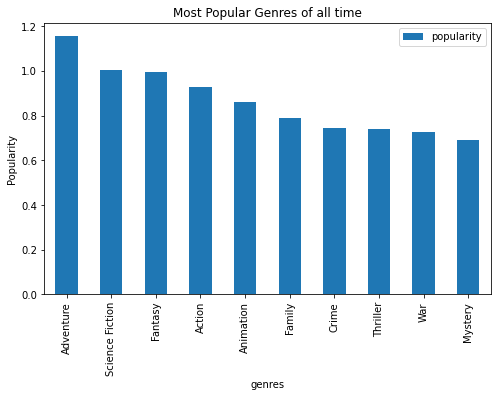

In [25]:
top_10_genres = avg_genre_pop.sort_values(ascending=False).head(10)
# plotting bar chart
chart_plot(top_10_genres, title="Most Popular Genres of all time", ylabel="Popularity")


From the above bar chart we see that the Leading genre in terms of popularity is **Adventure**, followed by **Science Fiction** and **Fantasy**

### Collecting some sample of the genres variable for more analysis

In [26]:
genre_sample = df.groupby('genres')['id'].count().sort_values(ascending=False)[:11]
df_genre_samp = df[df['genres'].isin(genre_sample.index.values.tolist())]


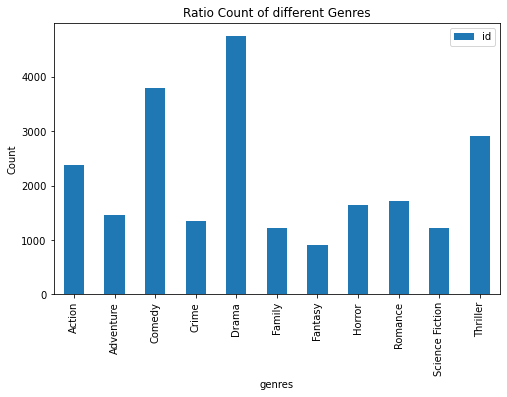

id
count    11.000000
mean   2121.727273
std    1219.420936
min     912.000000
25%    1288.000000
50%    1636.000000
75%    2641.000000
max    4754.000000

In [27]:
# plotting a bar chart to show the ratio of genres
genre_count = df_genre_samp.groupby('genres')['id'].count()

chart_plot(genre_count, "Ratio Count of different Genres", ylabel="Count")
pd.DataFrame(genre_count.describe())

The bar chart shows that from our sample the **Drama** Genre is the most common followed by **Comedy**

# Which movies are the most popular of all time?

In [28]:
# finding the average popularity of movies by original_title
avg_movie_pop = df.groupby('original_title')['popularity'].mean()


In [29]:
# selecting and sorting the 10 most popular movies
top10_popular_movie = avg_movie_pop.sort_values().tail(10)
top10_popular_movie

original_title
The Hunger Games: Mockingjay - Part 1    10.739009
Star Wars: The Force Awakens             11.173104
John Wick                                11.422751
Star Wars                                12.037933
Captain America: The Winter Soldier      12.971027
Insurgent                                13.112507
Guardians of the Galaxy                  14.311205
Interstellar                             24.949134
Mad Max: Fury Road                       28.419936
Jurassic World                           32.985763
Name: popularity, dtype: float64

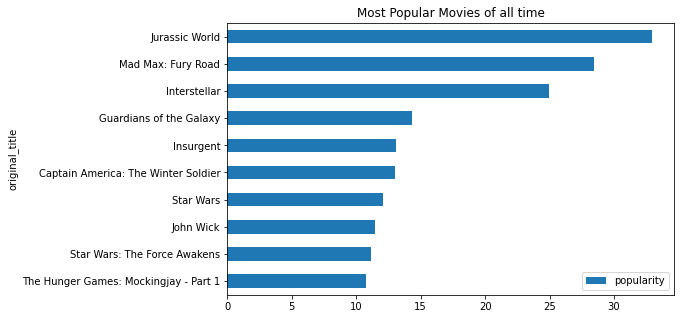

In [30]:
# plotting the variable on bar chart

chart_plot(top10_popular_movie, kind="barh", title="Most Popular Movies of all time", ylabel="Popularity")

From the bar plot we observe that Jurassic World is the leading movie in terms of Popularity, followed by Mad Max: Fury Road and Interstellar.

# Which movie title has the highest budget?

To find the movie with highest budget, we make use of the adjusted budget which accounts for inflation overtime

In [31]:
avg_movie_budget = df.groupby('original_title')['budget_adj'].mean()


## Sorting the average movie budget and pick the top movie

In [32]:

avg_movie_budget.sort_values(ascending=False).head(10)

original_title
The Warrior's Way                               4.250000e+08
Pirates of the Caribbean: On Stranger Tides     3.683713e+08
Pirates of the Caribbean: At World's End        3.155006e+08
Superman Returns                                2.920507e+08
Spider-Man 3                                    2.713305e+08
Tangled                                         2.600000e+08
Avengers: Age of Ultron                         2.575999e+08
Harry Potter and the Half-Blood Prince          2.541001e+08
Waterworld                                      2.504192e+08
Harry Potter and the Deathly Hallows: Part 1    2.500000e+08
Name: budget_adj, dtype: float64

It appears the Movie title named **The Warrior's Way** has the highest budget

#  Which movie title has the highest revenue?

To find the movie with highest revenue, we make use of the adjusted revenue which accounts for inflation overtime

In [33]:
avg_movie_revenue = df.groupby('original_title')['revenue_adj'].mean()


In [34]:
# sort the average movie revenue and pick the top movie
avg_movie_bar = avg_movie_revenue.sort_values(ascending=True).tail(10)


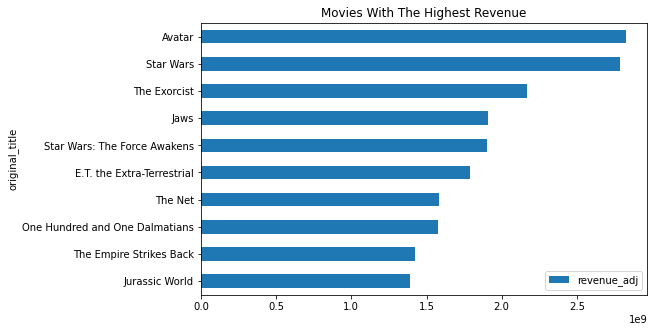

In [35]:
chart_plot(avg_movie_bar, kind="barh", title="Movies With The Highest Revenue", ylabel="Revenue")

From the observation we can tell that **Avatar** is the movie with the highest revenue, followed by **Star Wars** and **The Exorcist**

# What is the association of runtime over the period of time?

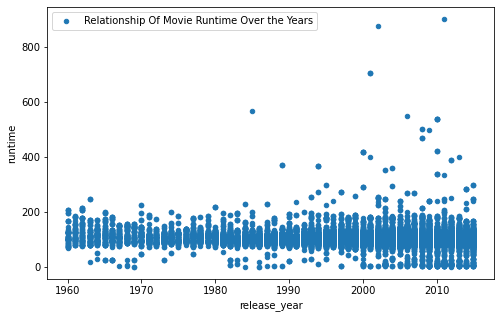

In [36]:
# A scatterplot to show association of runtime over period of time 

chart_plot(df, kind="scatter", x="release_year", y="runtime", label="Relationship Of Movie Runtime Over the Years")

From the scatter plot above we deduce that associaton of runtime over the years has fallen between the time span of 0 to 200 minutes. 

# What is the relationship of revenue over the period of time?


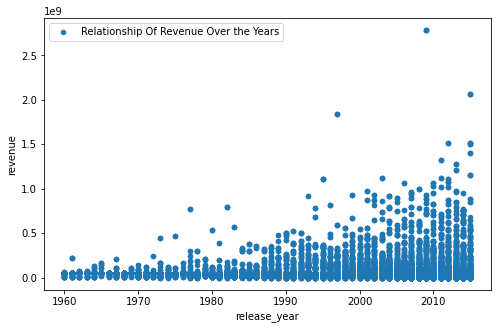

In [37]:
# A scatterplot to show association of Revenue over period of time
chart_plot(df, kind="scatter", x="release_year", y="revenue", label="Relationship Of Revenue Over the Years")

From the scatter plot above we deduce that associaton of Revenue over Time has a positive correlation. The revenue tends to increase as time goes by.

<a id='conclusions'></a>
## Conclusions

> After the analysing the movie database dataset I have found the answers to the some of the questions asked from the introduction
>* The most popular genre according to the dataset is the Adventure followed by Science Fiction and Fantasy
> I found this through comparing the mean of their various popurality score and sorting them from highest to lowest
>* The Movie title named **The Warrior's Way** has the highest budget
> I also made use of the mean statistics of the various budgets of the movie titles to find this.
>* Avatar is the movie with the highest revenue
> I answered this question by plotting a bar chart of the mean revenue against movies 
>* The movie runtime over the years has fallen mostly between the time span of 0 to 200 minutes according to the reading of the scatter plot showing the relationship of runtime over years
> The movie revenue tends to increase as time goes by.

> The number of samples I used for the analysis putting into consideration the rows with zero values which I had to replace with the mean value, may not be a good representation of the population? I think that missing values might influence the results of the analysis

> There are many variables and relationships left to explore within the dataset. Like, does popularity affect the movie revenue? does high budget movies yeild the most profit?  I am willing to accept any corrections made on my analysis and open to more ways to analyse the dataset


Reference:
https://pandas.pydata.org/docs/index.html